# EDA on transaction_info Dataset

This notebook performs exploratory data analysis (EDA) on the combined dataset of training and testing data.


## 1. Import Libraries


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## 2. Load the Data

In [2]:
# Load the transaction data
data = pd.read_csv('C:/Users/LENOVO/Documents/ML Time Series Forecasting/project/data/raw/transactions_info.csv')

## 3. Display Basic Information

In [3]:
# Display basic information
print("Combined Data Info:")
print(data.info())

Combined Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861722 entries, 0 to 861721
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date_id      861722 non-null  object 
 1   item_dept    861722 non-null  object 
 2   item_qty     861722 non-null  float64
 3   net_sales    861722 non-null  float64
 4   store        861722 non-null  object 
 5   item         861722 non-null  int64  
 6   invoice_num  830607 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 46.0+ MB
None


In [4]:
print("\nCombined Data Summary Statistics:")
print(data.describe())


Combined Data Summary Statistics:
            item_qty      net_sales           item   invoice_num
count  861722.000000  861722.000000  861722.000000  8.306070e+05
mean        1.519274     335.886942   67530.079838  4.227634e+06
std         3.141250     911.737663   48899.227757  1.709844e+06
min       -59.000000  -15250.000000     906.000000  1.475419e+06
25%         1.000000     126.000000   14360.000000  2.588637e+06
50%         1.000000     220.000000   89722.000000  4.599259e+06
75%         1.288000     375.210000  116972.000000  5.604364e+06
max      1200.000000  492000.000000  124233.000000  9.366931e+06


## 5. Understanding data

In [5]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
date_id            0
item_dept          0
item_qty           0
net_sales          0
store              0
item               0
invoice_num    31115
dtype: int64


In [6]:
# Check for negative values (adjust columns as needed)
print(data[data['item_qty'] < 0])

           date_id  item_dept  item_qty  net_sales store    item  invoice_num
165      11/9/2021    Grocery      -2.0     -310.0   XYZ   22344    1477390.0
166      11/9/2021    Grocery      -1.0     -145.0   XYZ  111698    1477390.0
310     11/13/2021  Beverages      -1.0     -500.0   XYZ    3266    1478124.0
428     11/20/2021  Household      -1.0     -320.0   XYZ  120471    1479525.0
1130    12/19/2021  Beverages      -1.0     -460.0   XYZ  122190    1486337.0
...            ...        ...       ...        ...   ...     ...          ...
858084   2/20/2022    Grocery      -1.0     -595.0   ABC   93746    4986246.0
858116   2/23/2022  Beverages      -2.0     -680.0   ABC  112362    4986976.0
858671   2/11/2022    Grocery      -1.0     -520.0   XYZ  118905    5606410.0
861178   2/23/2022    Grocery      -1.0     -120.0   ABC    4936    6936770.0
861179   2/23/2022    Grocery      -1.0     -495.0   ABC   28516    6936770.0

[1018 rows x 7 columns]


In [7]:
# Gropping countries by Total quantity
data.groupby('date_id')['item_qty'].sum().sort_values(ascending=False)

date_id
2/27/2022     18514.384
12/24/2021    17914.947
12/31/2021    17300.683
2/13/2022     15828.339
2/3/2022      14968.318
                ...    
12/7/2021      8325.918
1/19/2022      8250.902
1/5/2022       8235.888
11/22/2021     8074.052
1/3/2022       8034.677
Name: item_qty, Length: 120, dtype: float64

In [8]:
# Group by 'date_id' and 'store', and sum the 'item_qty' for each combination
daily_store_quantity = data.groupby(['date_id', 'store'])['item_qty'].sum().reset_index()

# Display the resulting grouped data
print(daily_store_quantity)

       date_id store  item_qty
0     1/1/2022   ABC  3984.540
1     1/1/2022   XYZ  4770.884
2    1/10/2022   ABC  4437.609
3    1/10/2022   XYZ  5049.550
4    1/11/2022   ABC  5341.708
..         ...   ...       ...
235   2/7/2022   XYZ  6296.438
236   2/8/2022   ABC  5876.401
237   2/8/2022   XYZ  6024.556
238   2/9/2022   ABC  5564.455
239   2/9/2022   XYZ  6825.078

[240 rows x 3 columns]


In [9]:
# Group by 'date_id' and 'store', and sum the 'item_qty' for each combination
daily_department_quantity = data.groupby(['date_id', 'item_dept'])['item_qty'].sum().reset_index()

# Display the resulting grouped data
print(daily_department_quantity)

       date_id  item_dept  item_qty
0     1/1/2022  Beverages  2031.000
1     1/1/2022    Grocery  5154.424
2     1/1/2022  Household  1570.000
3    1/10/2022  Beverages  1982.000
4    1/10/2022    Grocery  5304.159
..         ...        ...       ...
355   2/8/2022    Grocery  7321.957
356   2/8/2022  Household  2500.000
357   2/9/2022  Beverages  2741.000
358   2/9/2022    Grocery  7175.533
359   2/9/2022  Household  2473.000

[360 rows x 3 columns]


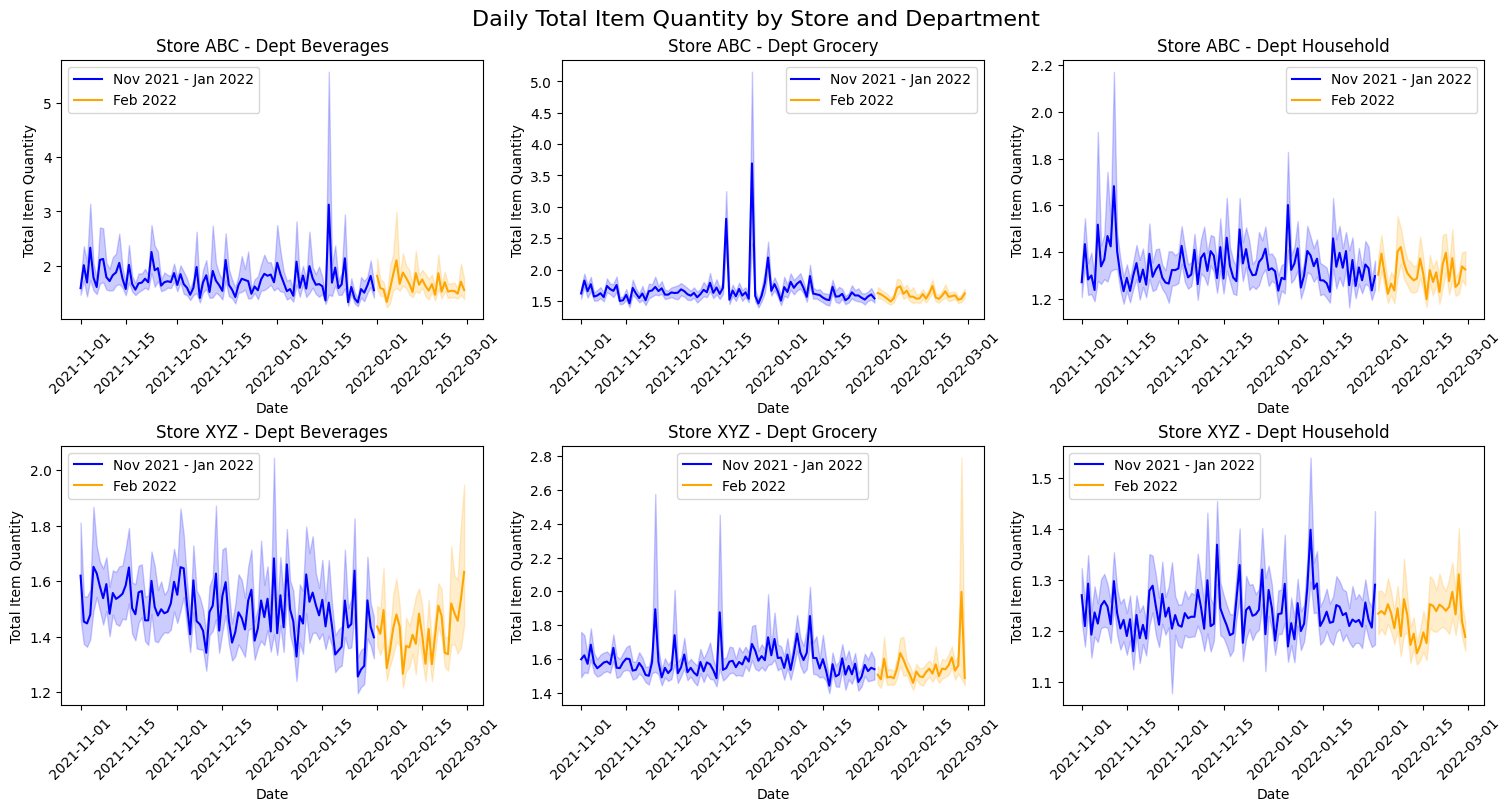

In [11]:
# Ensure date_id is in datetime format
data['date_id'] = pd.to_datetime(data['date_id'])

# Replace inf values with NaN to avoid warnings
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Define the time periods
period_1_start = pd.to_datetime('2021-11-01')
period_1_end = pd.to_datetime('2022-01-31')

period_2_start = pd.to_datetime('2022-02-01')
period_2_end = pd.to_datetime('2022-02-28')

# Get unique combinations of stores and departments
unique_combinations = data.groupby(['store', 'item_dept']).size()

# Set the number of rows and columns for the grid
n_plots = len(unique_combinations)
n_cols = 3  # Number of columns in the grid
n_rows = int(np.ceil(n_plots / n_cols))  # Calculate number of rows needed

# Create a large figure to hold the grid of plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4), constrained_layout=True)

# Flatten axes for easy indexing (in case of multiple rows)
axes = axes.flatten()

# Loop through each unique store and department combination and plot
for idx, ((store, item_dept), group) in enumerate(data.groupby(['store', 'item_dept'])):
    # Filter data for the first time period
    period_1_data = group[(group['date_id'] >= period_1_start) & (group['date_id'] <= period_1_end)]
    
    # Filter data for the second time period
    period_2_data = group[(group['date_id'] >= period_2_start) & (group['date_id'] <= period_2_end)]
    
    # Plot on the corresponding axis
    sns.lineplot(x='date_id', y='item_qty', data=period_1_data, ax=axes[idx], label='Nov 2021 - Jan 2022', color='blue')
    sns.lineplot(x='date_id', y='item_qty', data=period_2_data, ax=axes[idx], label='Feb 2022', color='orange')
    
    # Set title and labels for each subplot
    axes[idx].set_title(f'Store {store} - Dept {item_dept}')
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('Total Item Quantity')
    
    # Rotate x-axis labels by 45 degrees
    axes[idx].tick_params(axis='x', rotation=45)

# Hide any empty subplots if n_plots is not a perfect multiple of n_cols
for i in range(n_plots, n_rows * n_cols):
    fig.delaxes(axes[i])

# Save the entire figure with all the plots
fig.suptitle('Daily Total Item Quantity by Store and Department', fontsize=16)

# Show the grid of plots
plt.show()


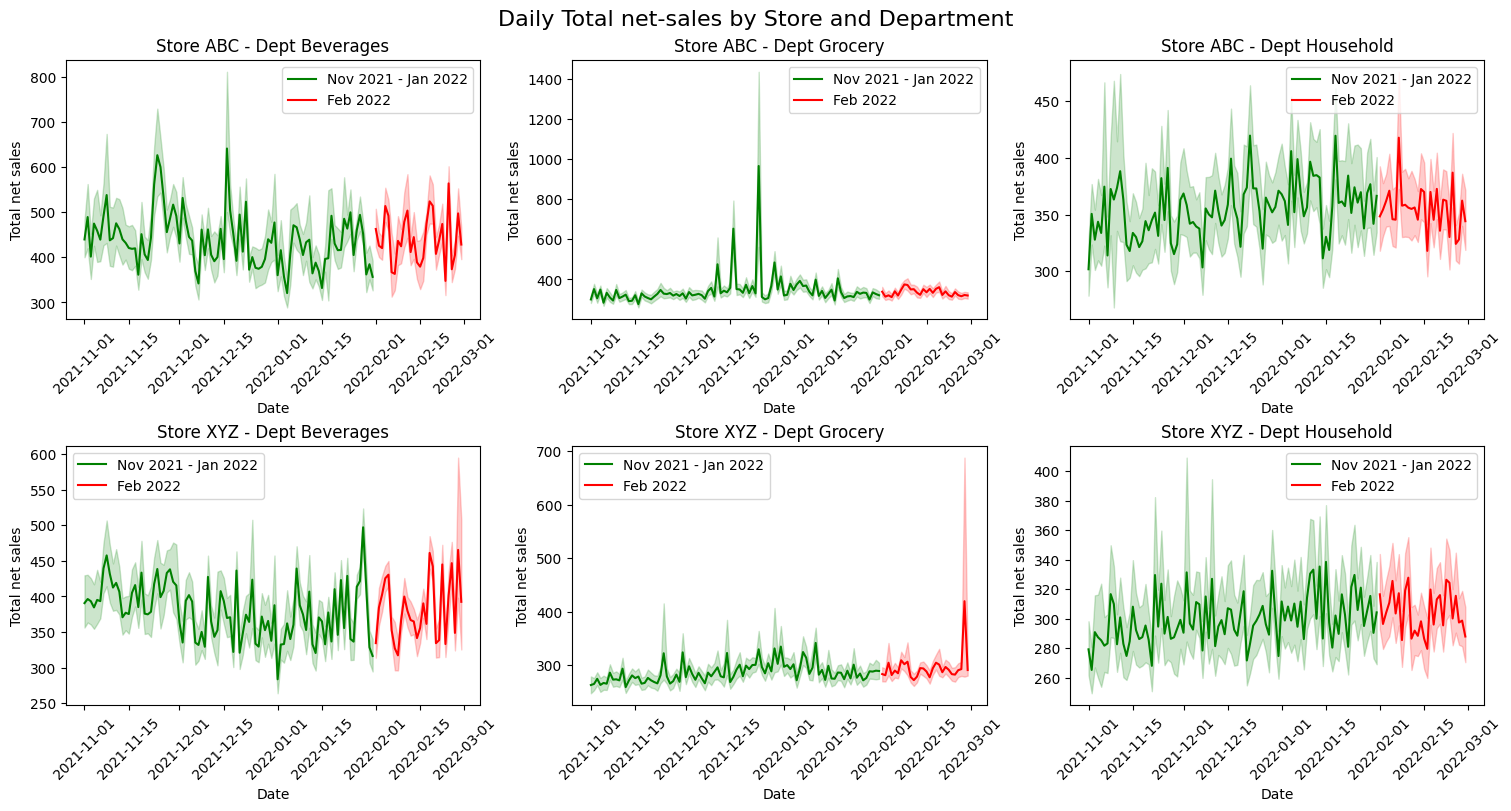

In [35]:
# Ensure date_id is in datetime format
data['date_id'] = pd.to_datetime(data['date_id'])

# Replace inf values with NaN to avoid warnings
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Define the time periods
period_1_start = pd.to_datetime('2021-11-01')
period_1_end = pd.to_datetime('2022-01-31')

period_2_start = pd.to_datetime('2022-02-01')
period_2_end = pd.to_datetime('2022-02-28')

# Get unique combinations of stores and departments
unique_combinations = data.groupby(['store', 'item_dept']).size()

# Set the number of rows and columns for the grid
n_plots = len(unique_combinations)
n_cols = 3  # Number of columns in the grid
n_rows = int(np.ceil(n_plots / n_cols))  # Calculate number of rows needed

# Create a large figure to hold the grid of plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4), constrained_layout=True)

# Flatten axes for easy indexing (in case of multiple rows)
axes = axes.flatten()

# Loop through each unique store and department combination and plot
for idx, ((store, item_dept), group) in enumerate(data.groupby(['store', 'item_dept'])):
    # Filter data for the first time period
    period_1_data = group[(group['date_id'] >= period_1_start) & (group['date_id'] <= period_1_end)]
    
    # Filter data for the second time period
    period_2_data = group[(group['date_id'] >= period_2_start) & (group['date_id'] <= period_2_end)]
    
    # Plot on the corresponding axis
    sns.lineplot(x='date_id', y='net_sales', data=period_1_data, ax=axes[idx], label='Nov 2021 - Jan 2022', color='green')
    sns.lineplot(x='date_id', y='net_sales', data=period_2_data, ax=axes[idx], label='Feb 2022', color='red')
    
    # Set title and labels for each subplot
    axes[idx].set_title(f'Store {store} - Dept {item_dept}')
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('Total net sales')
    
    # Rotate x-axis labels by 45 degrees
    axes[idx].tick_params(axis='x', rotation=45)

# Hide any empty subplots if n_plots is not a perfect multiple of n_cols
for i in range(n_plots, n_rows * n_cols):
    fig.delaxes(axes[i])

# Save the entire figure with all the plots
fig.suptitle('Daily Total net-sales by Store and Department', fontsize=16)

# Show the grid of plots
plt.show()


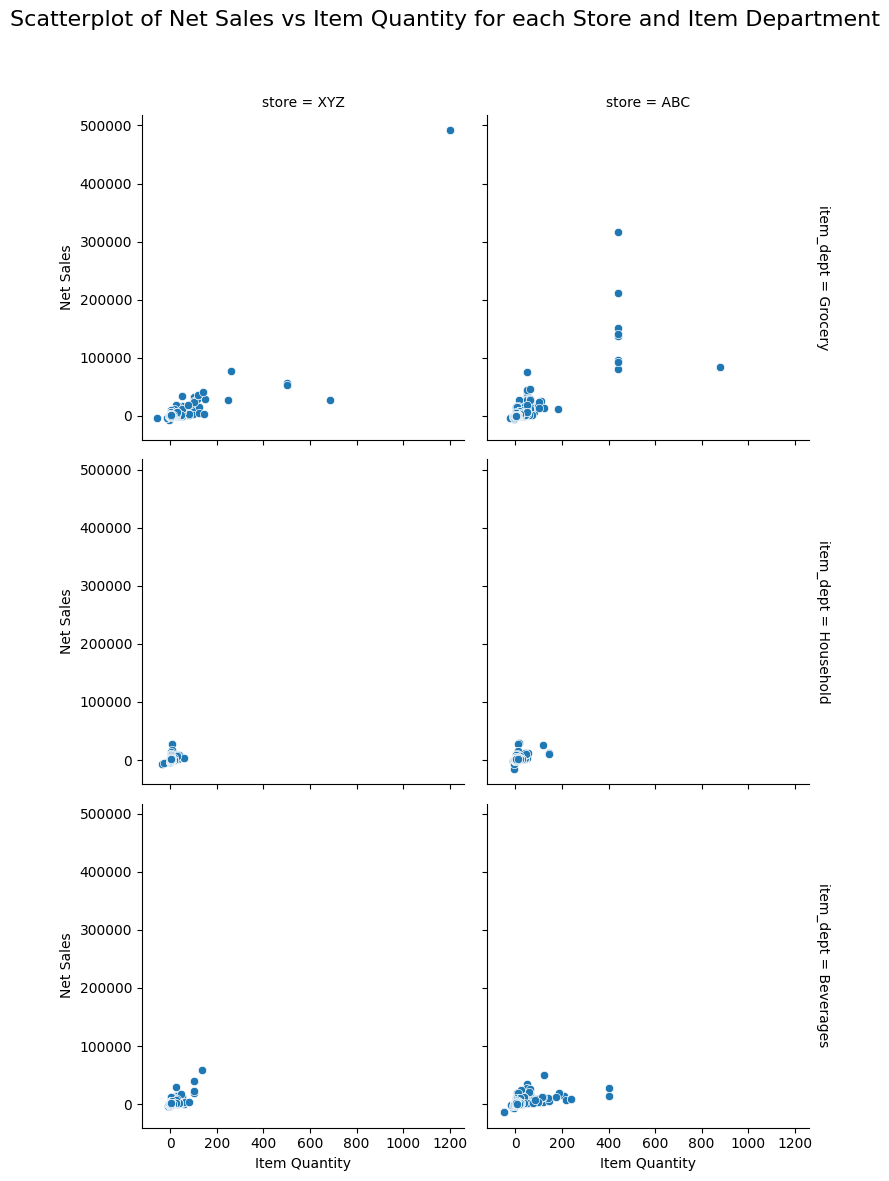

In [29]:
# Create the FacetGrid with scatter plots for each store and item_dept combination
g = sns.FacetGrid(data, col='store', row='item_dept', margin_titles=True, height=4)
g.map(sns.scatterplot, 'item_qty', 'net_sales')

# Adding titles and labels
g.fig.suptitle('Scatterplot of Net Sales vs Item Quantity for each Store and Item Department', fontsize=16)
g.set_axis_labels('Item Quantity', 'Net Sales')

# Adjust the layout to avoid overlapping titles
plt.tight_layout(rect=[0, 0, 1, 0.95])
# Show the plot
plt.show()